In [36]:
import pandas as pd

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
import numpy as np

In [70]:
df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')

In [71]:
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

In [72]:
df['trip_duration'] = pd.lpep_dropoff_datetime - pd.lpep_pickup_datetime

In [73]:
df['trip_duration'] = df.trip_duration.apply(lambda td: td.total_seconds()/60)

/tmp/ipykernel_5255/1862710170.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.trip_duration)


<Axes: xlabel='trip_duration', ylabel='Density'>

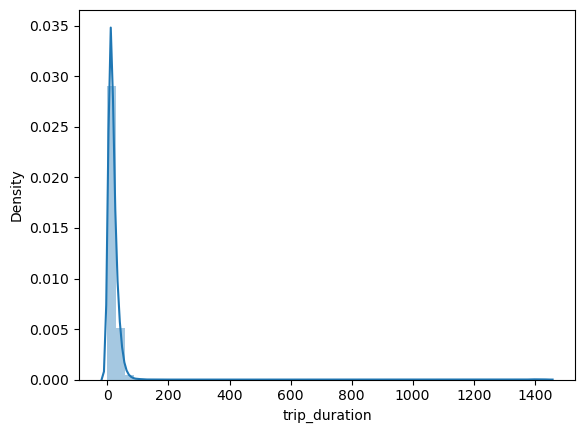

In [74]:
sns.distplot(df.trip_duration)

In [75]:
df.trip_duration.describe()

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
25%          8.000000
50%         13.883333
75%         23.000000
max       1439.600000
Name: trip_duration, dtype: float64

In [76]:
df.trip_duration.describe(percentiles=[0.95,0.98,0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: trip_duration, dtype: float64

In [77]:
#For our purposes, lets focus on durations that are at least 1 minute and max 60 minutes
df = df[((df.trip_duration>=1) & (df.trip_duration<=60))]

In [78]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [110]:
df_dict = df[categorical + numerical].to_dict(orient = 'records')

In [111]:
dv = DictVectorizer()
X_train = dv.fit_transform(df_dict)


In [112]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 221724 stored elements and shape (73908, 507)>

In [113]:
target = 'trip_duration'
y_train = df[target].values
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])

In [114]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [115]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_5255/394890068.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label = 'prediction')
/tmp/ipykernel_5255/394890068.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,label = 'actual')


<Axes: ylabel='Density'>

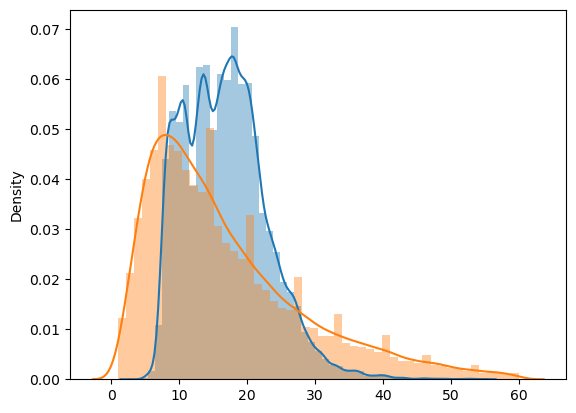

In [117]:
sns.distplot(y_pred,label = 'prediction')
sns.distplot(y_train,label = 'actual')

In [122]:
np.sqrt(mean_squared_error(y_train,y_pred))

np.float64(9.838799799829626)